# Customer Churn Analysis

### Dataset info: sample dataset containing customer data and showing customer left last month


In [2]:
# importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

*load the data file*

In [4]:
df = pd.read_csv("Churn_Modelling_EDA.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


check the various attributes of data like shape( rows and cols),columns,datatypes

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
#checking the dtypes of all columns

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
#check the descriptive statistics of numerical values
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* SeniorCitizen is actually categorical value,hence the 25%-50%-75% distribution not proper
* 75% customer in tenure less than 55 months 
* Average monthlycharges are USD 64.76 Where as 25% customer pay more than USD 89.85 in month
 

In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
df["Churn"].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

* Data is highly imbalanced,ratio = 73.4
* so we analyse the data with other feature while taking target values seprately to get some insights

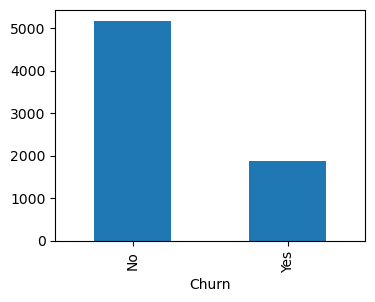

In [15]:
df['Churn'].value_counts().plot(kind= "bar",figsize = (4,3))
plt.xlabel = ("Count")
plt.ylabel = ("Target variable")
plt.title = ("Count of Target Variable per category")
plt.show()

In [16]:
# concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
'''
# finding missing percentage in dataframe
missing = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()

plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data = missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage Missing Value")
plt.yticks("Percentage")
plt.show()
'''

'\n# finding missing percentage in dataframe\nmissing = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()\n\nplt.figure(figsize=(16,5))\nax = sns.pointplot(\'index\',0,data = missing)\nplt.xticks(rotation=90,fontsize=7)\nplt.title("Percentage Missing Value")\nplt.yticks("Percentage")\nplt.show()\n'

# Missing data-Initialintuition

* here,we dont have any missing data
### General Thumb Rule:
   * For feature with less missing value-can use regression to predict the missing value or fill with the mean of the values present,depending on the 
     feature
   * For feature with high number of missing value-its better to drop those columns as they give very less insights on analysis.
   
   * As there is no thumb rule on what criteria do we delete the columns with high number of missing values,but generally you can delete the columns,if 
     you have more than 30%-40% of missing values,But again there is catch here, for example, is_car & car_type, people having no cars, will obviously
     have Car_types as Null(null),but that doesnt make these columns useless,so decision has to be taken wisely
    

# Data Cleaning

create a copy of base data for manupulation & processing !!

In [21]:
df1 = df.copy()

In [22]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


TotalCharges should be into numerical values,lets convert into numeric datatype

In [24]:
df1.TotalCharges = pd.to_numeric(df1["TotalCharges"],errors = "coerce")

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there 11 null values in TotalCharges,lets check these records

In [28]:
df1.loc[df1["TotalCharges"].isnull() == True]# finding those 11 null values 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Missing Value Treatment

In [30]:
11/7043*100 

0.1561834445548772

since the % of these records compared to total dataset is very low i.e 0.15% its safe ignore them further processing

In [32]:
#removing missing values
df1.dropna(how = 'any',inplace=True)

Divide Customer into bins based on tenure e.g.for tenure < 12 months: assign a tenure group if 1-12,for tenure between 1 to 2
years,tenure group of 13-24: so on..

In [34]:
#Get the max tenure
print(df1['tenure'].max())#72

72


In [35]:
labels = [('{0} - {1}'.format(i, i + 11)) for i in range(1,72,12)]
labels
          

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [36]:
# Group tenure into bins for 12 months
labels = [('{0} - {1}'.format(i, i + 11)) for i in range(1,72,12)]

df1['tenure_group'] = pd.cut(df1.tenure,range(1,80,12),right=False,labels=labels)
                                                        

In [37]:
df1.tenure_group.value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [38]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


Removing columns which is not required for processing

In [40]:
#droping columns customerid and tenure
df1.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [41]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

1.plot distribution of individual predictors by churn

### Univariate Analysis

In [45]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


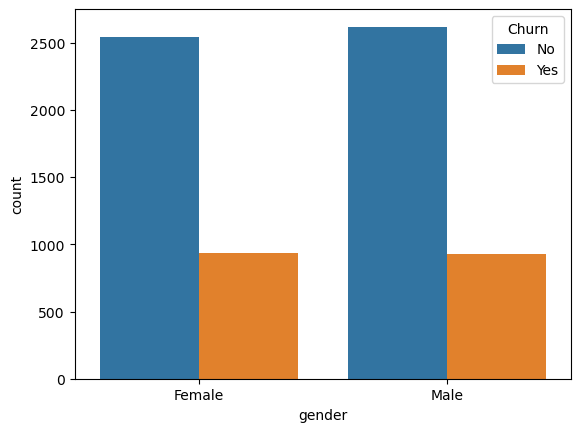

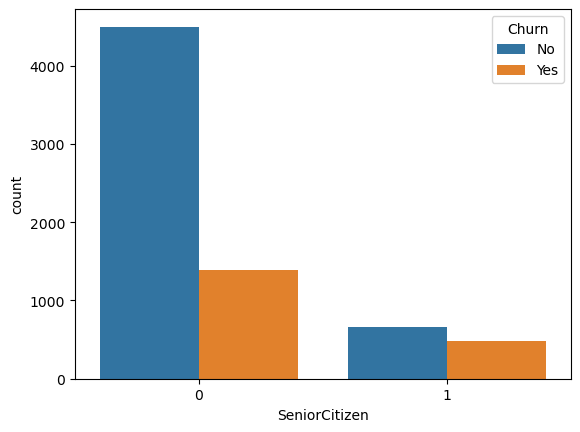

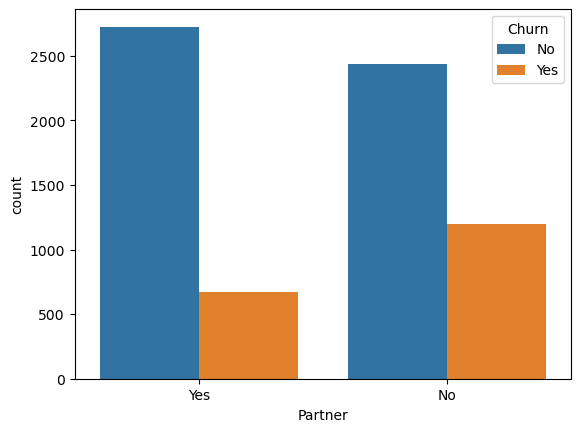

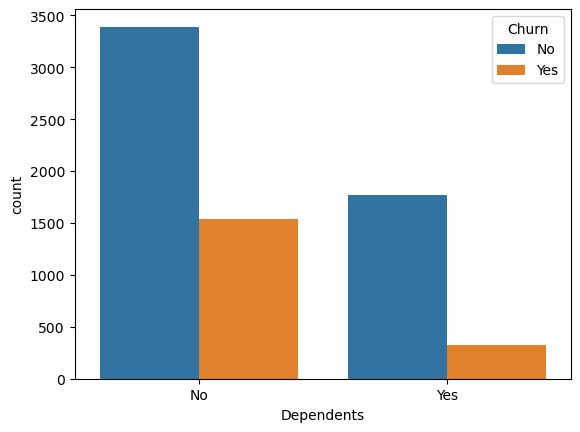

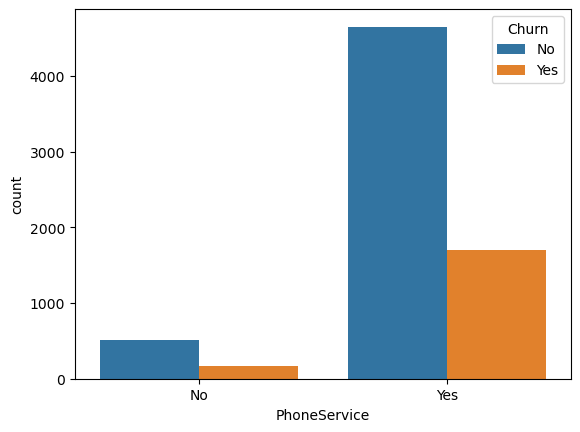

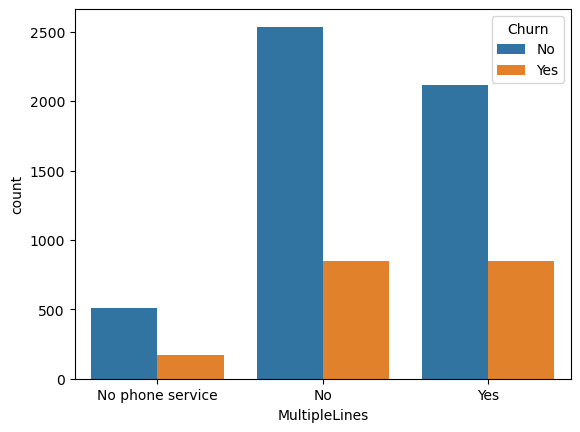

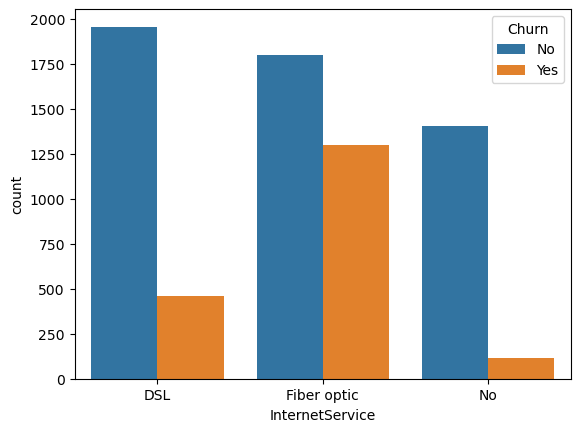

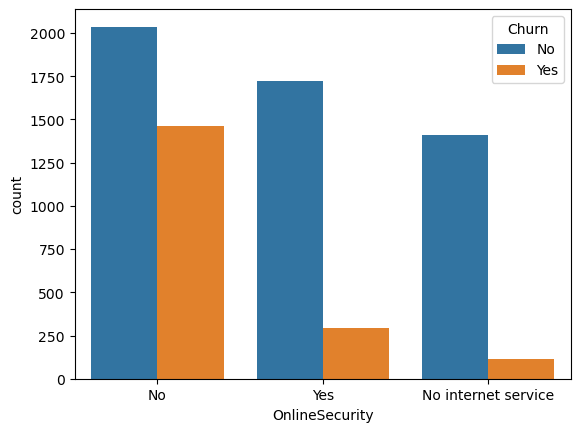

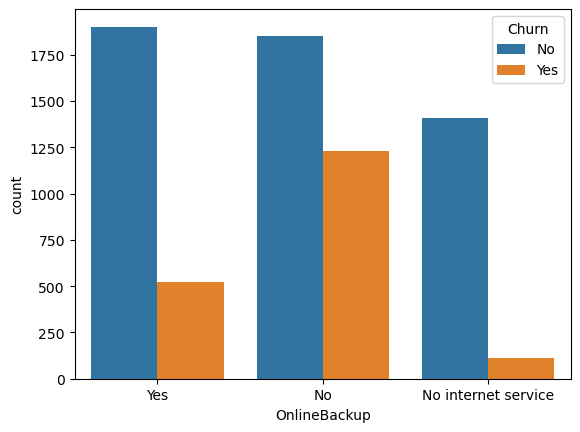

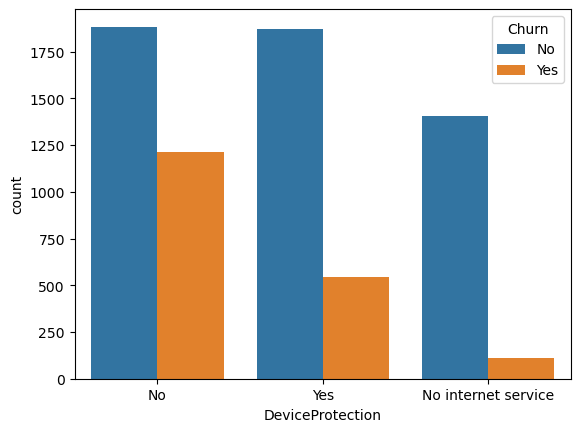

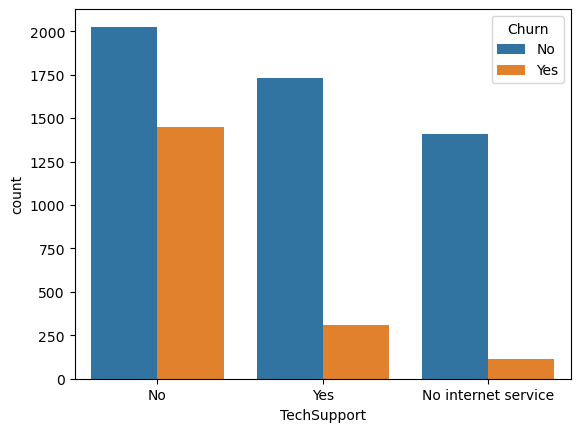

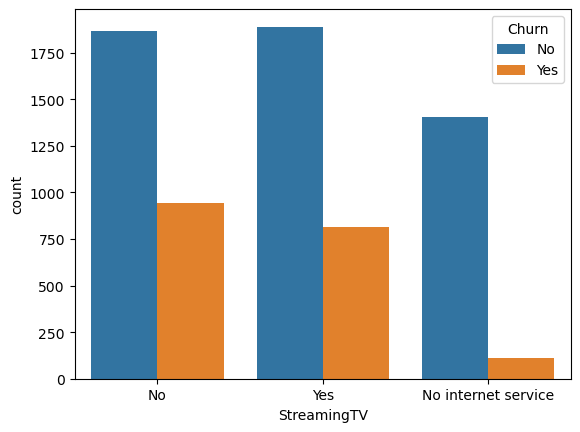

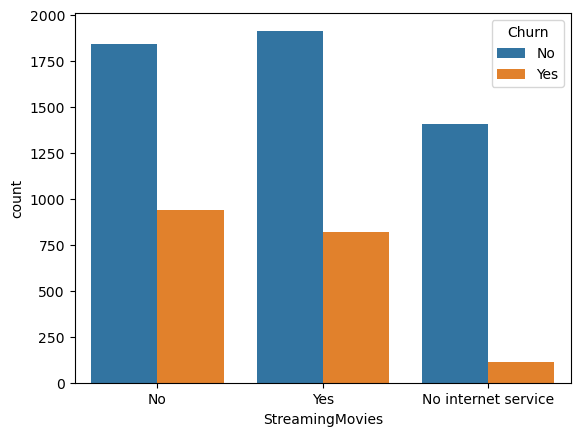

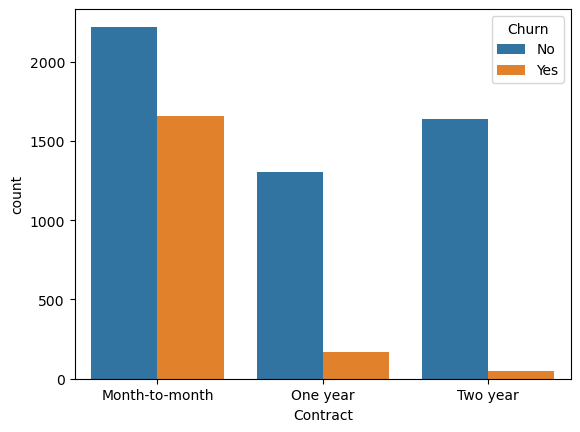

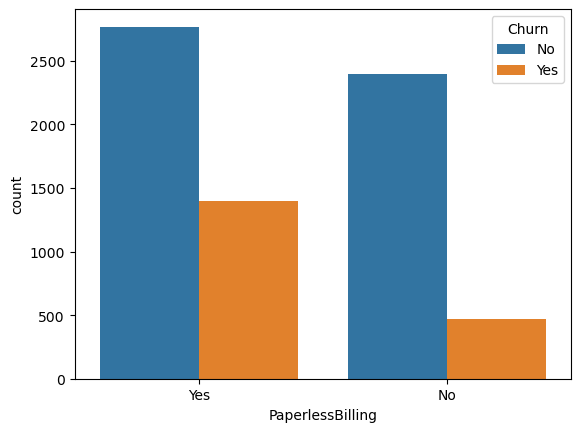

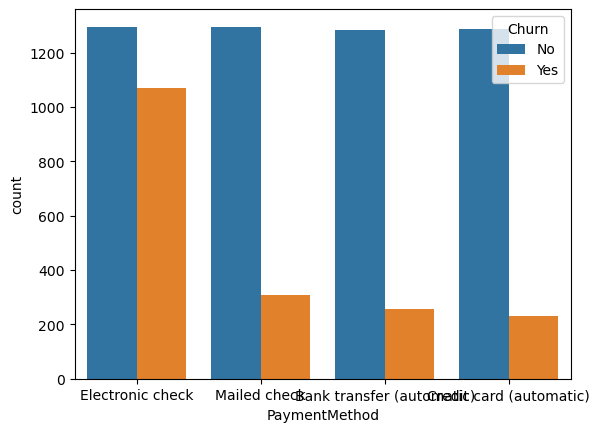

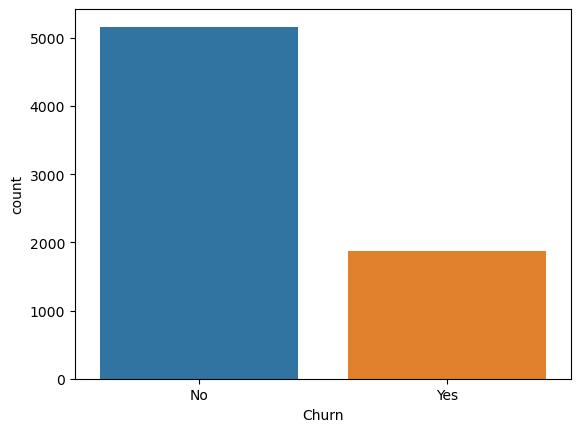

In [46]:
#droping numerical columns to see each and individual categorical columns compare with target variable column="churn"
for i,predictor in enumerate(df1.drop(columns = ['MonthlyCharges','TotalCharges','tenure_group'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor,hue='Churn')


## base data of Churn rate : 26.5%
#### Gender: 900/3450 * 100 =26% (Female),900/3500 * 100 = 25.71% (male)
* almost 26% female customer has churned
* 26% male customer has churned 

#### Senior Citizen : 1300/5800 * 100 = 22.4% (not senior citizen),1000/400 * 100 = 40% (senior citizen)

* 40% senior citizen are more likely to churn


#### Partner : 1300/3700 * 100 = 35% (people with NO partner)

* people with No partner are more likely to churn

#### Contract: 1700/4100 * 100 = 41% (monthly),200/1500 * 100 = 13% (one year),100/1800 * 100 = 5% (two year)
* Monthly contracts are more likely to churn because they are free customer

#### Payment Method:
* people who are pay via electronic check are more likely to churn

# Numerical Analysis

In [53]:
df1.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [54]:
new_df1_target0 = df1[df1['Churn']=='No']
new_df1_target1 = df1[df1['Churn']=='Yes']#churn customer

In [55]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [56]:
pd.crosstab(df1.PaymentMethod,df1.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Electronic check: 1071/2365 * 100 = 46%
* almost 46% of people who are pay via electronic are more likely to churn

##### convert target variable "Churn" into binary numeric varaible i.e yes = 1 and No = 0

In [59]:
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

In [60]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


### Feature encoding
* dummy encoding


In [62]:
new_df1_dummies = pd.get_dummies(df1,dtype = int)
new_df1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### Relationship between Monthlycharges and Total Charges

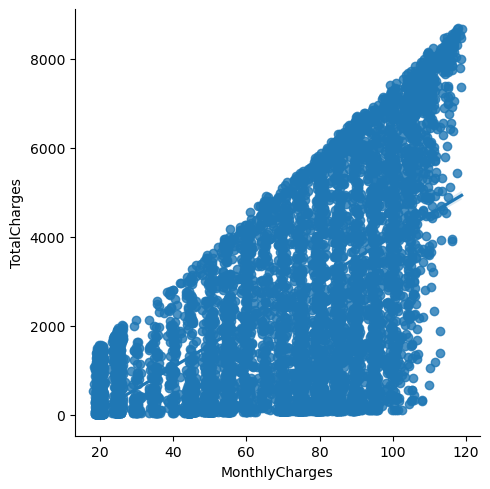

In [64]:
sns.lmplot(data = new_df1_dummies, x = 'MonthlyCharges' , y = 'TotalCharges')

###### Correlation for MonthlyCharges and Totalcharges

In [66]:
new_df1_dummies['MonthlyCharges'].corr(new_df1_dummies['TotalCharges'])# positively correlated

0.6510648032262024

### Churn by mothlycharges and Totalcharges

C:\Users\Windows\AppData\Local\Temp\ipykernel_5264\842641190.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(new_df1_dummies.MonthlyCharges[(new_df1_dummies['Churn']==0)],color = "Red", shade=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_5264\842641190.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(new_df1_dummies.MonthlyCharges[(new_df1_dummies['Churn']==1)],ax=mth,color = "Blue", shade=True)


Text(0.5, 1.0, 'Monthly charges by Churn')

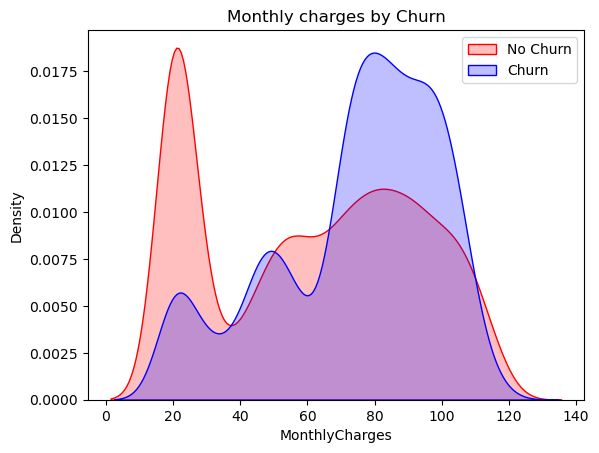

In [68]:
mth = sns.kdeplot(new_df1_dummies.MonthlyCharges[(new_df1_dummies['Churn']==0)],color = "Red", shade=True)
mth = sns.kdeplot(new_df1_dummies.MonthlyCharges[(new_df1_dummies['Churn']==1)],ax=mth,color = "Blue", shade=True)
mth.legend(['No Churn','Churn'],loc = 'upper right')
mth.set_xlabel = ('Density')
mth.set_ylabel = ('Monthlycharges')
mth.set_title('Monthly charges by Churn')

* churn is very high when monthly charges are 60 and above
* churn is low when monthly charges are 10 to 40

C:\Users\Windows\AppData\Local\Temp\ipykernel_5264\1332314680.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(new_df1_dummies.TotalCharges[(new_df1_dummies['Churn']==0)],color = "Red", shade=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_5264\1332314680.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(new_df1_dummies.TotalCharges[(new_df1_dummies['Churn']==1)],ax=mth,color = "Blue", shade=True)


Text(0.5, 1.0, 'Total charges by Churn')

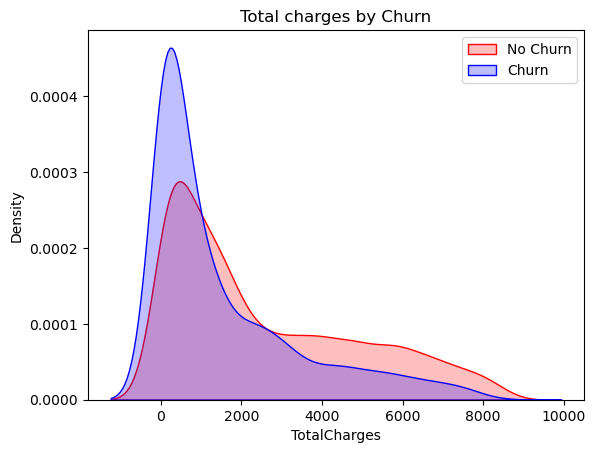

In [70]:
mth = sns.kdeplot(new_df1_dummies.TotalCharges[(new_df1_dummies['Churn']==0)],color = "Red", shade=True)
mth = sns.kdeplot(new_df1_dummies.TotalCharges[(new_df1_dummies['Churn']==1)],ax=mth,color = "Blue", shade=True)
mth.legend(['No Churn','Churn'],loc = 'upper right')
mth.set_xlabel = ('Density')
mth.set_ylabel = ('TotalCharges')
mth.set_title('Total charges by Churn')

*suprising insight* as high churn at lower Total Charges

* however if we combine the insights of 3 parameters i.e, Tenure,Monthly charges & Total charges then the picture are bit clear:- higher monthly charge
  at lower tenure results into lower total charge,hence all three factors viz # higher monthly charge,# lower tenure and # lower total charge are linked to higher churn

#### bulid correlation with all predictors with "churn"

<Axes: >

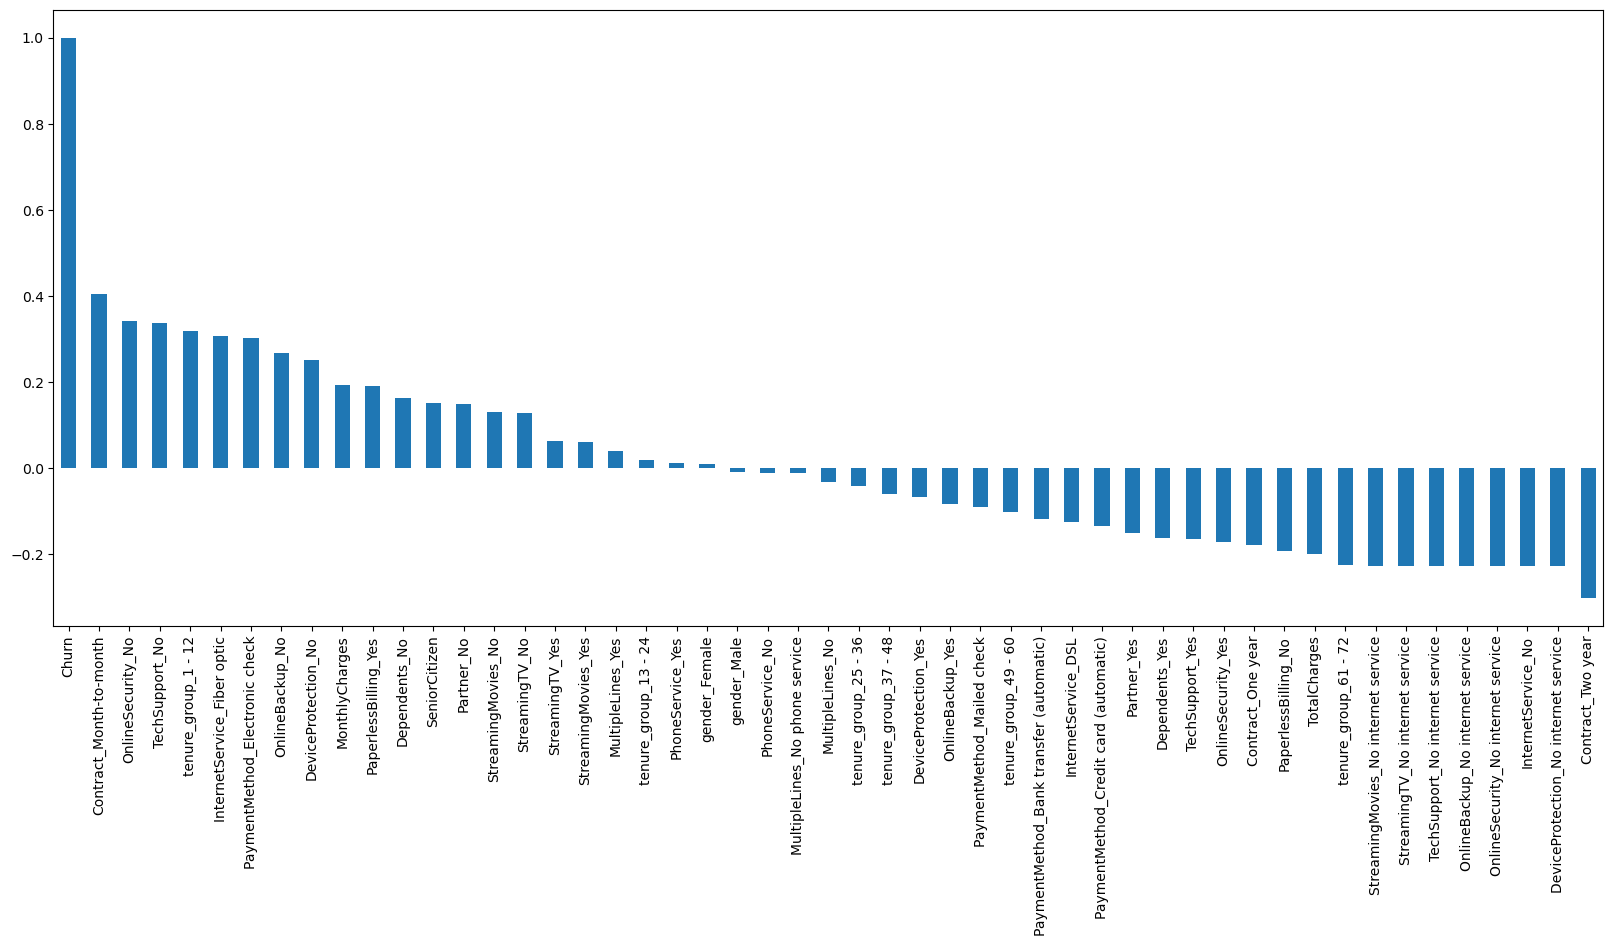

In [73]:
plt.figure(figsize = (20,8))
new_df1_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

##### Derived insights

* online security_no are high churners
* Techsupport_no are high churners
* tenure_group_1-12 are high churners
* internetservice_fiber optic are high churners
* paymentmethod_electronic check are high churners 
* people who are stay in service for longer period of time they are low churners


 * The Evident of heatmap below

<Axes: >

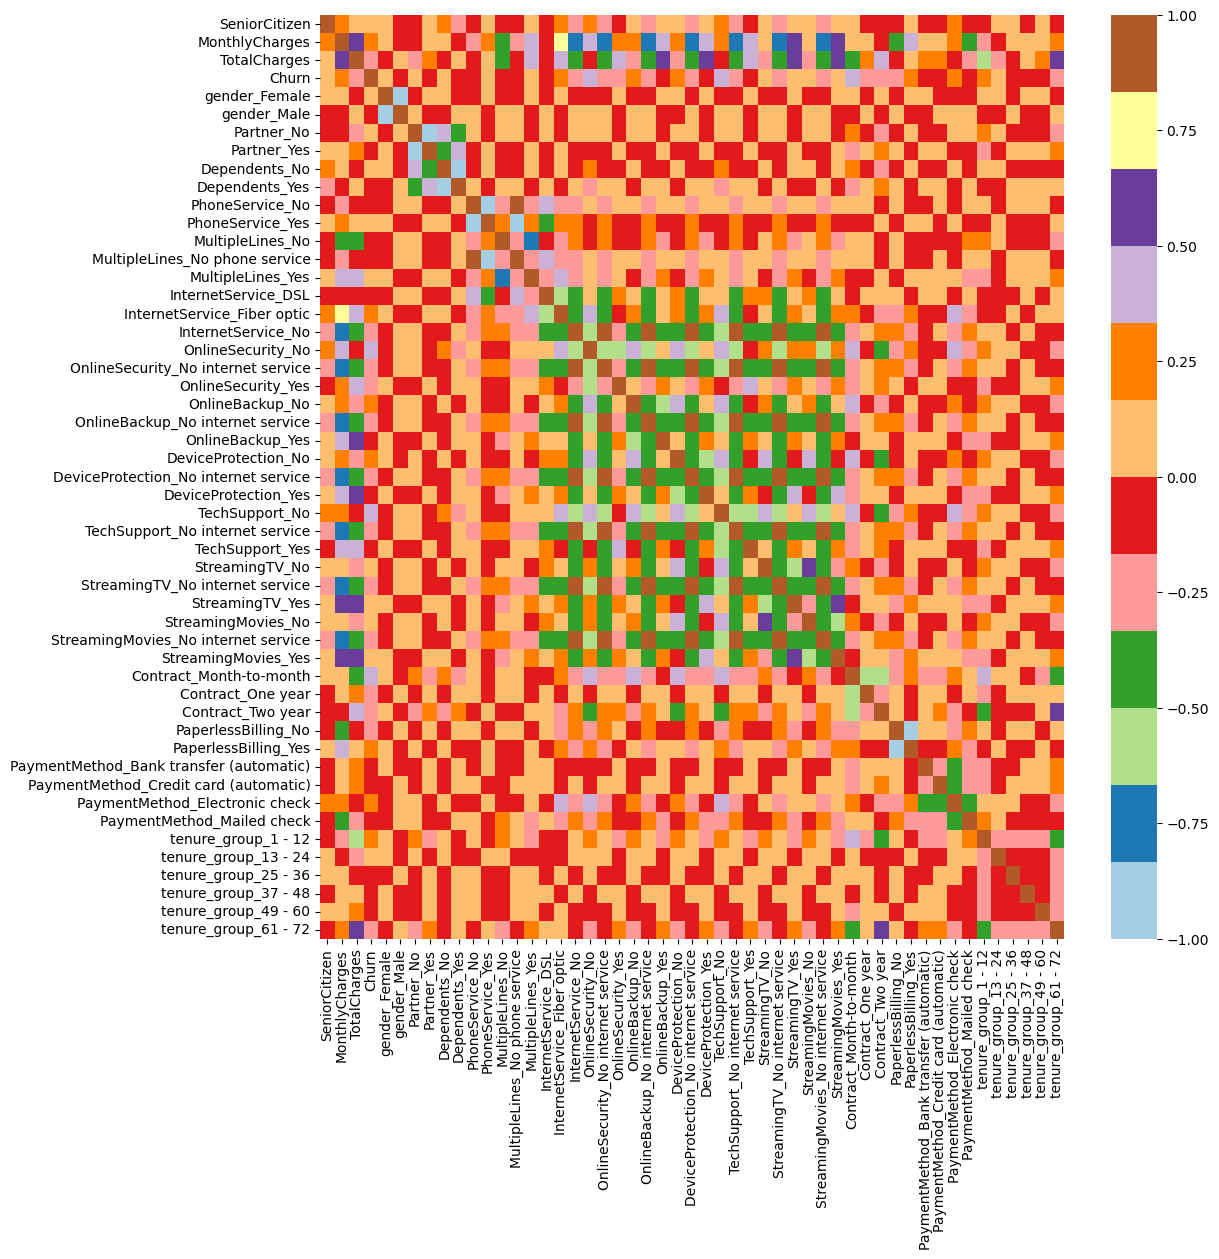

In [119]:
plt.figure(figsize = (12,12))
sns.heatmap(new_df1_dummies.corr(),cmap = 'Paired')

C:\Users\Windows\AppData\Local\Temp\ipykernel_5264\1562290675.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(df.tenure[(df['Churn']== 'No')],color = "Red", shade=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_5264\1562290675.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(df.tenure[(df['Churn']== 'Yes')],ax=mth,color = "Blue", shade=True)


Text(0.5, 1.0, 'Tenure by Churn')

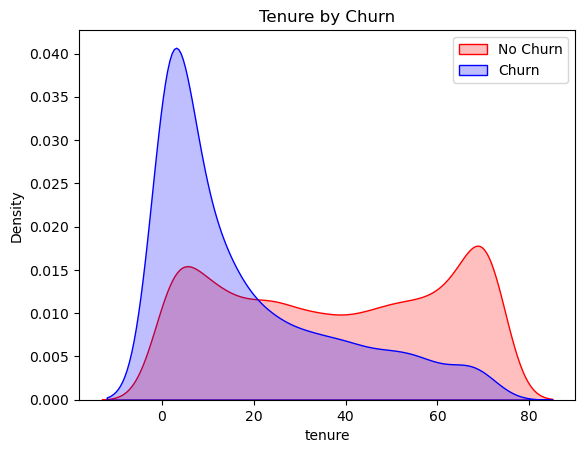

In [130]:
mth = sns.kdeplot(df.tenure[(df['Churn']== 'No')],color = "Red", shade=True)
mth = sns.kdeplot(df.tenure[(df['Churn']== 'Yes')],ax=mth,color = "Blue", shade=True)
mth.legend(['No Churn','Churn'],loc = 'upper right')
mth.set_xlabel = ('Density')
mth.set_ylabel = ('Tenure')
mth.set_title('Tenure by Churn')

### Bivariate Analysis

In [134]:
new_df1_target0 = df1.loc[df1['Churn']==0]
new_df1_target1 = df1.loc[df1['Churn']==1]

In [136]:
len(new_df1_target0)

5163

In [138]:
len(new_df1_target1)

1869

In [177]:
'''
def uniplot(df,col,title,hue = None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']= 20
    plt.rcParams['axes.titlesize']= 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue ,palette = 'bright')

    plt.show()
    '''

In [181]:

def uniplot(df, col, title, hue=None):
    # Set general Seaborn style and context
    sns.set(style='whitegrid', context='talk')
    
    # Define figure size based on the number of unique categories in `col` and `hue`
    num_categories = len(df[col].unique())
    num_hue = len(df[hue].unique()) if hue else 0
    width = max(num_categories + 7, 10) + 4 * num_hue
    fig, ax = plt.subplots(figsize=(width, 8))
    
    # Set axis label and title size
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('Count (log scale)', fontsize=20)
    ax.set_title(title, fontsize=22, pad=30)
    
    # Plot with log scale on y-axis
    sns.countplot(data=df, x=col, hue=hue, palette='bright', ax=ax, order=df[col].value_counts().index)
    ax.set_yscale('log')  # Use logarithmic scale for the y-axis
    
    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()


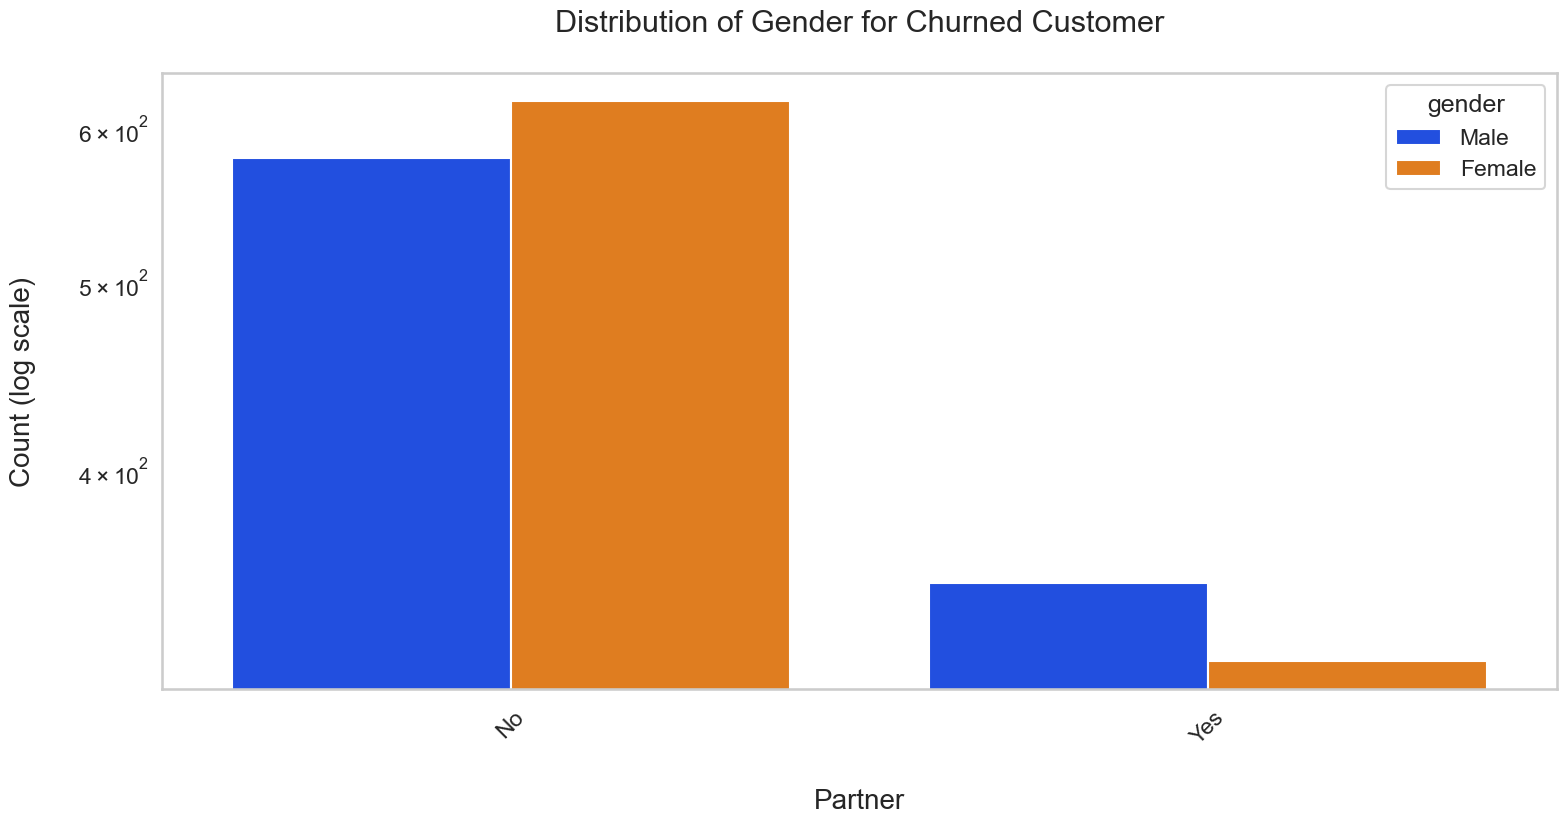

In [183]:
uniplot(new_df1_target1, col = 'Partner',title = 'Distribution of Gender for Churned Customer',hue = 'gender')

* people who dont have partners in female category they are more likely to churner
* male customer who have partner are more likely to churn

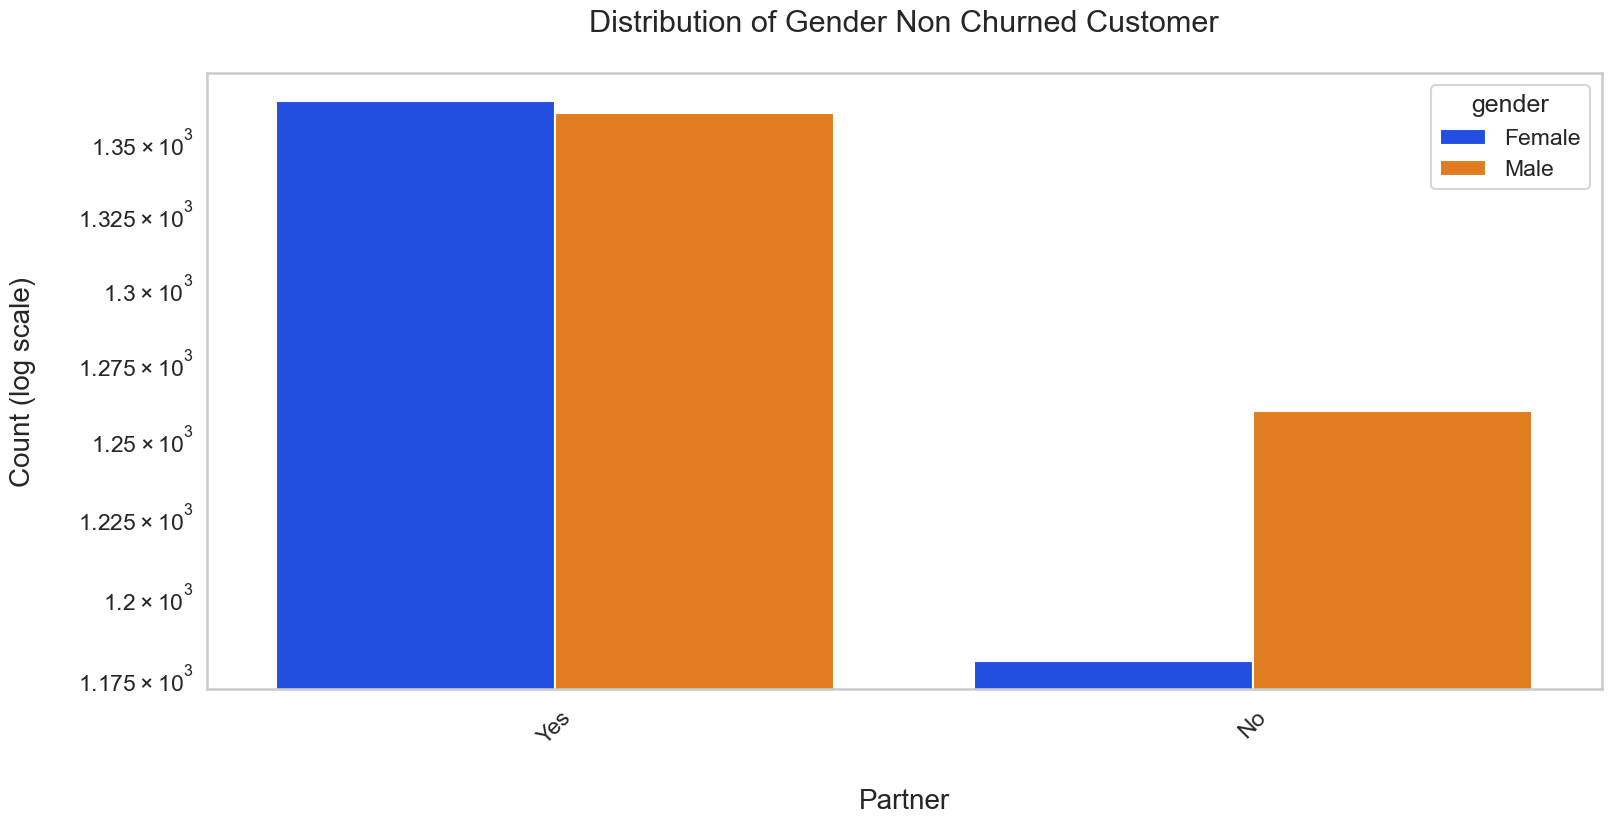

In [190]:
uniplot(new_df1_target0, col = 'Partner',title = 'Distribution of Gender Non Churned Customer',hue = 'gender')

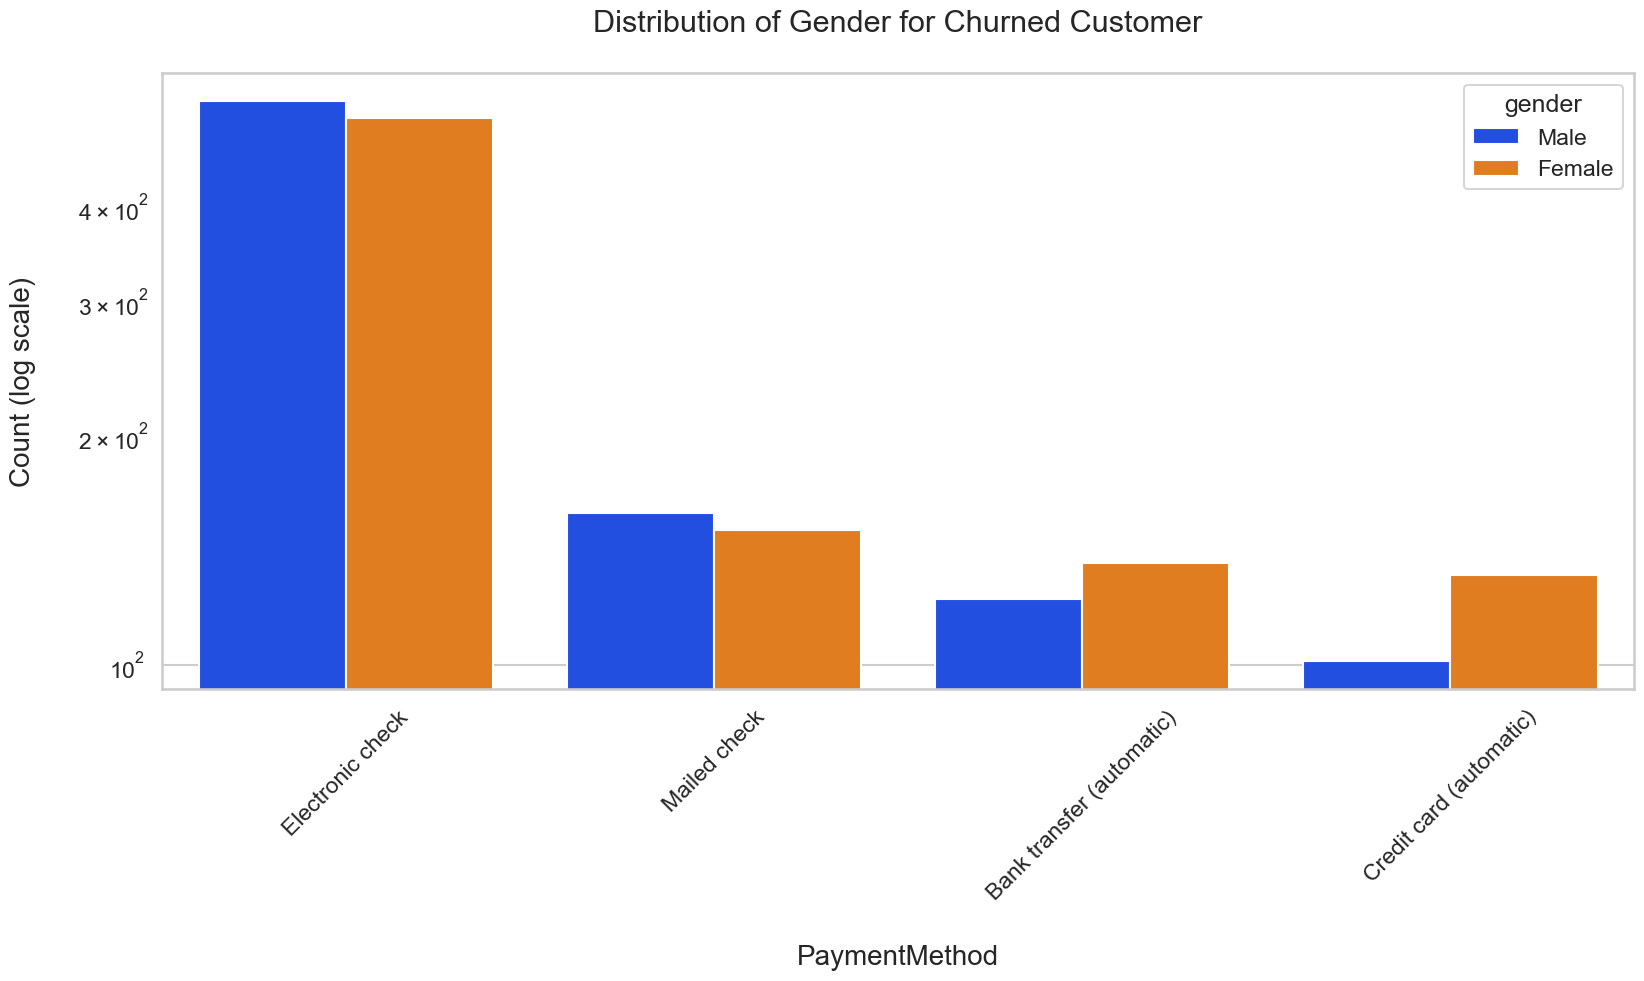

In [194]:
uniplot(new_df1_target1, col = 'PaymentMethod',title = 'Distribution of Gender for Churned Customer',hue = 'gender')

* At credit card(automatic) in female customer are more likely to churner

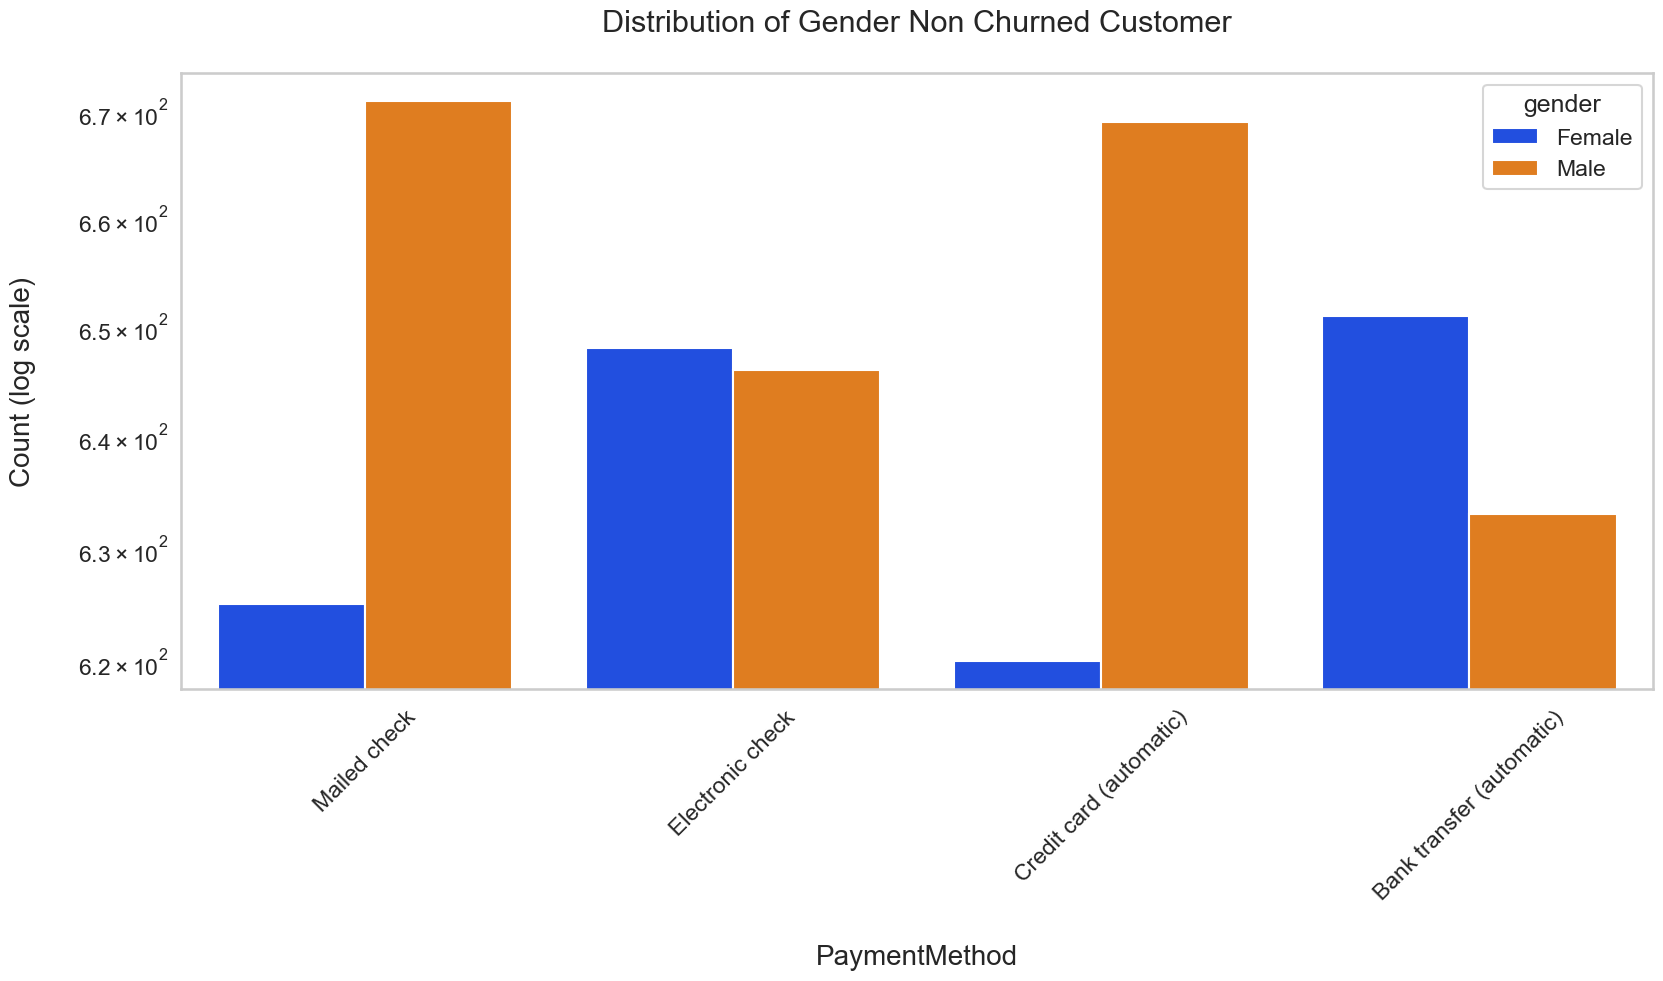

In [198]:
uniplot(new_df1_target0, col = 'PaymentMethod',title = 'Distribution of Gender Non Churned Customer',hue = 'gender')

* In bank transfer(automatic) the female customer more in "Non Churner"

## CONCLUSION

These are some of unique insights from this "Churn Analysis Dataset"

* Electronic checks medium are highest churner
* Contract Type - monthly customers are more likely to churn because of No contract terms,as they are free to  go customers.
* No online security, No Tech Support are high churners
* Non Senior citizen are high churners

